In [17]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

image = cv2.imread("/content/dog-smiling.png")
image = cv2.resize(image,(200,200),interpolation=cv2.INTER_AREA)


def show(edges):
  border = 2
  out1 = cv2.copyMakeBorder(image,border,border,border,border,cv2.BORDER_CONSTANT,value=(0,0,0))
  out2 = cv2.copyMakeBorder(edges,border,border,border,border,cv2.BORDER_CONSTANT,value=(0,0,0))

  row = np.hstack((out1,out2))
  cv2_imshow(row)

**Edge detection**


---

used to identify boundaries within an image.


*   object detection
*   image segmentation
*   feature extraction

the intensity of an image changes


---



تشخیص لبه یکی از تکنیک‌های پایه در پردازش تصویر است که برای شناسایی مرزها و خطوط بین مناطق مختلف در تصویر استفاده می‌شود.

تشخیص لبه به دنبال نقاطی در تصویر است که شدت روشنایی (intensity) ناگهانی تغییر می‌کند.

1.**Gradient-Based**

این دسته از تشخیص لبه بر اساس محاسبه اولین مشتق تصویر (first derivative) عمل می‌کنند.
ایده: جایی که تغییر شدت (intensity) زیاد است → لبه وجود دارد.


1.   Sobel Operator
2.   Roberts Cross Operator
3.   Prewitt Operator


ایده‌ی اصلی همه‌ی این‌ها این است:

لبه‌ها جاهایی هستند که شدت نور (intensity) تصویر به‌طور ناگهانی تغییر می‌کند.

برای تشخیص لبه، باید مشتق تصویر را محاسبه کنیم، یعنی ببینیم شدت تصویر چقدر سریع تغییر می‌کند.

**Roberts Cross Operator**

کوچک‌ترین و ساده‌ترین روش برای گرادیان.

تغییرات مورب (diagonal) را نگاه می‌کند.

کرنل‌ها ۲×۲ هستند و فقط روی ۴ پیکسل هم‌جوار عمل می‌کنند.

کرنل یک ماتریس کوچک است که روی تصویر اعمال می‌شود تا تغییرات یا ویژگی‌ها را پیدا کند.

کرنل مشخص می‌کند چه ترکیبی از پیکسل‌های اطراف یک پیکسل اصلی برای محاسبه نتیجه استفاده شود.

---

کانولوشن فرآیندی است که کرنل را روی تصویر “می‌لغزانیم” و در هر موقعیت، مقادیر پیکسل‌های تحت پوشش کرنل را با مقادیر کرنل ضرب و جمع می‌کنیم.

نتیجه → تصویر جدید که ویژگی خاصی (مثلاً تغییر شدت یا لبه‌ها) را برجسته می‌کند.



---

گرادیان یعنی سرعت تغییر شدت در تصویر.

یک تصویر ۲ بعدی داریم: I(x,y) شدت تصویر در پیکسل (x,y)

گرادیان = چقدر شدت تصویر در جهت x یا y تغییر می‌کند:




*   very sensative to noise
*   not accurate



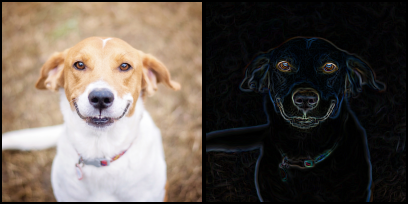

In [18]:
kernelx = np.array([[1, 0],[0, -1]], dtype=np.float32)
kernely = np.array([[0, 1],[-1, 0]], dtype=np.float32)




grad_x = cv2.filter2D(image, cv2.CV_32F, kernelx)
grad_y = cv2.filter2D(image, cv2.CV_32F, kernely)

# combine gradients
edges = cv2.magnitude(grad_x, grad_y)

# convert float to unit8 (0 to 255)
edges = cv2.convertScaleAbs(edges)


show(edges)


**Prewitt Operator**


شبیه Roberts است ولی کرنل‌ها بزرگ‌تر (۳×۳) و روی افقی و عمودی تمرکز دارند.

مزیت: نسبت به Roberts مقاوم‌تر به نویز و می‌تواند لبه‌ها را کمی بهتر نشان دهد.

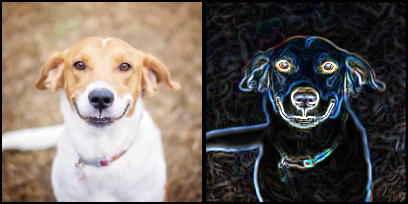

In [19]:
Gx = [[-1,0,1],
      [-1,0,1],
      [-1,0,1]]

Gy = [[1, 1, 1],
      [0, 0, 0],
      [-1,-1,-1]]

kernelx = np.array(Gx,dtype=np.float32)
kernely = np.array(Gy,dtype=np.float32)

grad_x = cv2.filter2D(image,cv2.CV_32F,kernelx)
grad_y = cv2.filter2D(image,cv2.CV_32F,kernely)

edges = cv2.magnitude(grad_x,grad_y)
edges = cv2.convertScaleAbs(edges)


show(edges)

**Sobel Operator**

شبیه Prewitt است ولی پیکسل‌های مرکزی وزن بیشتری دارند.

مزیت: همزمان لبه‌ها را مشخص و نویز را هم کمی صاف می‌کند.

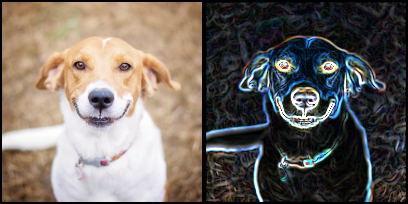

In [20]:
grad_x = cv2.Sobel(image, cv2.CV_32F, 1, 0, ksize=3)
grad_y = cv2.Sobel(image, cv2.CV_32F, 0, 1, ksize=3)

edges = cv2.magnitude(grad_x, grad_y)
edges = cv2.convertScaleAbs(edges)

show(edges)


> **sobel is the strogest**
